In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [4]:
model_train = 'mobnet'
model_infer = 'lstm'

gmd = pd.read_csv(f'interleaved_{model_train}_train_{model_infer}_infer_multi_al.csv')
nnRan250 = pd.read_csv(f'interleaved_{model_train}_train_{model_infer}_infer_nn_random_multi_al.csv')
nnRan50 = pd.read_csv(f'interleaved_{model_train}_train_{model_infer}_infer_nn_alt_random_multi_al.csv')

nnRan50 = nnRan50.add_suffix('_50')
nnRan50.rename(columns={
    'power_budget_50': 'power_budget',
    'time_budget_50': 'time_budget',
    'arr_rate_50': 'arr_rate'
}, inplace=True)

gmd['power_budget'] = gmd['power_budget'].astype(int)
merged_df = pd.merge(gmd, nnRan250, on=['power_budget', 'time_budget', 'arr_rate'], how='outer', suffixes=('_gmd', '_nnRan250'))
merged_df = pd.merge(merged_df, nnRan50, on=['power_budget', 'time_budget', 'arr_rate'], how='outer')

# Display merged DataFrame
merged_df.to_csv('merged_data.csv', index=False)
# merged_df.columns

In [5]:
nn50 = merged_df[['bs_nn_50', 'infer_time_nn_50', 'interleaved_power_nn_50', 'num_train_batches_nn_50', 'power_budget', 'arr_rate', 'time_budget']]
nn50['num_pwds'] = 50
# nn50 = nn50[nn50['soln_nn_50'] == 1]
# nn50 = nn50[nn50['arr_rate'] == arr_rate]
# nn50 = nn50[nn50['power_budget'] == pb]
        
nn250 = merged_df[['bs_nn', 'infer_time_nn', 'interleaved_power_nn', 'num_train_batches_nn', 'power_budget', 'arr_rate', 'time_budget']]
nn250['num_pwds'] = 250
# nn250 = nn250[nn250['soln_nn'] == 1]
# nn250 = nn250[nn250['arr_rate'] == arr_rate]
# nn250 = nn250[nn250['power_budget'] == pb]

gmd = merged_df[['bs_algo', 'infer_time_algo', 'interleaved_power_algo', 'num_train_batches_algo', 'power_budget', 'arr_rate', 'time_budget']]
gmd['num_pwds'] = merged_df['num_tries_algo']
# gmd = gmd[gmd['soln_algo'] == 1]
# gmd = gmd[gmd['arr_rate'] == arr_rate]
# gmd = gmd[gmd['power_budget'] == pb]

# bs = merged_df[['bs_bs', 'observed_time', 'observed_power', 'power_budget', 'arr_rate', 'time_budget']]
# bs['num_pwds'] = merged_df['num_pwds_bs']
# bs = bs[bs['soln_bs'] == 1]
# bs = bs[bs['arr_rate'] == arr_rate]
# bs = bs[bs['power_budget'] == pb]

rnd = merged_df[['bs_random_50', 'infer_time_random_50', 'interleaved_power_random_50', 'num_train_batches_random_50', 'power_budget', 'arr_rate', 'time_budget']]
rnd['num_pwds'] = 50
# rnd = rnd[rnd['soln_random_50'] == 1]
# rnd = rnd[rnd['arr_rate'] == arr_rate]
# rnd = rnd[rnd['power_budget'] == pb]

optim = merged_df[['bs_optim', 'infer_time_optim', 'interleaved_power_optim','num_train_batches_optim', 'power_budget', 'arr_rate', 'time_budget']]
# optim = optim[optim['soln_optim'] == 1]
# optim = optim[optim['arr_rate'] == arr_rate]
# optim = optim[optim['power_budget'] == pb]


C:\Users\laksh\AppData\Local\Temp\ipykernel_22004\931829310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nn50['num_pwds'] = 50
C:\Users\laksh\AppData\Local\Temp\ipykernel_22004\931829310.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nn250['num_pwds'] = 250
C:\Users\laksh\AppData\Local\Temp\ipykernel_22004\931829310.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [6]:
gmd.dropna(inplace=True)
rnd.dropna(inplace=True)
nn50.dropna(inplace=True)
nn250.dropna(inplace=True)
optim.dropna(inplace=True)

C:\Users\laksh\AppData\Local\Temp\ipykernel_22004\3311785525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gmd.dropna(inplace=True)
C:\Users\laksh\AppData\Local\Temp\ipykernel_22004\3311785525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rnd.dropna(inplace=True)
C:\Users\laksh\AppData\Local\Temp\ipykernel_22004\3311785525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nn50.dropna(inplace=True)
C:\Users\laksh\AppData\L

In [7]:
# nn50.to_csv('nn50.csv')
# nn250.to_csv('nn250.csv')
# gmd.to_csv('gmd.csv')
# rnd.to_csv('rnd.csv')
# optim.to_csv('optim.csv')

In [8]:
gmd_tries = list(gmd['num_pwds'])
random_tries = list(rnd['num_pwds'])
nn_tries = list(nn50['num_pwds'])
nn250_tries = list(nn250['num_pwds'])

# # rake mean tries for all
gmd_tries_mean = np.mean(gmd_tries)
random_tries_mean = np.mean(random_tries)
nn_tries_mean50 = 100
nn_tries_mean250 = 100

mean_tries_list = [random_tries_mean, nn_tries_mean250, gmd_tries_mean]
mean_tries_list

[50.0, 100, 10.490277777777777]

In [9]:
min(gmd_tries), max(gmd_tries), np.mean(gmd_tries)

(10.0, 14.0, 10.490277777777777)

In [10]:
# datalist = [rnd['penalty'].values, nn50['penalty'].values, nn250['penalty'].values, gmd['penalty'].values]
datalist = [rnd['num_train_batches_random_50'].values, nn250['num_train_batches_nn'].values, gmd['num_train_batches_algo'].values, optim['num_train_batches_optim'].values]
datalist 

[array([0., 0., 0., ..., 3., 3., 3.]),
 array([0., 0., 0., ..., 3., 3., 3.]),
 array([0., 0., 0., ..., 5., 5., 5.]),
 array([0., 0., 0., ..., 5., 5., 5.])]

In [11]:
if model_train == 'yolo' and model_infer == 'resnet':# Reordered labels
    labels = ['RND', 'NN250', 'GMD', 'OPT']

    # Reordered colors
    colors = ['#e36668', '#fadc6f', '#84b070', '#61b1ff']

    fig, ax = plt.subplots(figsize=(5, 6))  # Adjust the figure size as needed

    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(1)  # change width
        ax.spines[axis].set_color('k')    # change color

    sns.boxplot(data=datalist, 
                palette=colors,
                width=0.5, 
                whis=(0, 100), 
                linewidth=1,  # set linewidth directly in boxplot function
                whiskerprops=dict(color="black", alpha=1), 
                medianprops=dict(color="black", alpha=1),
                boxprops=dict(edgecolor="black"),
                ax=ax)

    ax2 = ax.twinx()
    for i, value in enumerate(mean_tries_list):
        ax2.plot(i, value, marker='D', markersize=8, color='blue', linestyle='None')
        
    ax2.tick_params(axis='y', which='major', labelsize=22)
    # ax2.set_ylabel('Mean Tries', fontsize=24, color='blue')
    ax2.spines['right'].set_color('blue')


    # Set the x-axis ticks and labels
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, fontsize=22)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    ax.tick_params(axis='y', which='major', labelsize=20)

    # Add gridlines
    ax.grid(which='major', linestyle='-', linewidth='0.5', color='black', alpha=0.7)
    ax.grid(which='minor', linestyle='-', linewidth='0.5', color='lightgray')
    ax.minorticks_on()

    # Add a horizontal line at y=0
    ax.axhline(y=0, linewidth=3, color='black')

    # Calculate medians for each group and add text annotations
    medians = [np.median(x) for x in datalist]
    # if model_train == 'resnet' and model_infer == 'mobnet':
    #     ax.text(labels.index('RND'), 0, f'{medians[0]:.2f}', ha='center', va='bottom', fontsize=16, color='black')
    #     ax.text(labels.index('NN50'), 0, f'{medians[1]:.2f}', ha='center', va='bottom', fontsize=16, color='black')
    #     ax.text(labels.index('NN250'), 0, f'{medians[2]:.2f}', ha='center', va='bottom', fontsize=16, color='black')
    #     ax.text(labels.index('GMD'), 0, f'{medians[3]:.2f}', ha='center', va='bottom', fontsize=16, color='black')
    #     ax.text(labels.index('OPT'), 0, f'{medians[4]:.2f}', ha='center', va='bottom', fontsize=16, color='black')

    # else:
    for label, median_value in zip(labels, medians):
        if(median_value >= 10):
            ax.text(labels.index(label), 9, f'{median_value:.1f}', ha='center', va='bottom', fontsize=16, color='black')
        else:
            ax.text(labels.index(label), median_value+0.5, f'{median_value:.1f}', ha='center', va='bottom', fontsize=16, color='black')

    ax2.text(labels.index('NN250'), 100, '250', ha='center', va='bottom', fontsize=16, color='blue')
    median_value = np.median(optim['num_train_batches_optim'])
    # ax.text(labels.index('OPT'), median_value, f'{median_value:.2f}', ha='center', va='bottom', fontsize=16, color='black')
    ax.axvline(x=labels.index('RND') + 0.5, color='grey', linestyle='-', linewidth=2)
    ax.axvline(x=labels.index('NN250') + 0.5, color='grey', linestyle='-', linewidth=2)
    ax.axvline(x=labels.index('GMD') + 0.5, color='grey', linestyle='-', linewidth=2)

    # Adjust y-axis limits
    ax.set_ylim(0, 5)
    ax.set_yticks(np.arange(0, 6, 1))
    ax2.set_ylim(0, 100)
    ax.set_axisbelow(True)
    ax2.tick_params(axis='y', labelsize=22, colors='blue')
    ax2.spines['right'].set_color('blue')
    ax.set_ylabel('# Minibatches trained \nper Window', fontsize=24)

    plt.tight_layout()
    plt.savefig('boxPlot_num_train_batches_'+model_train+'_train_'+model_infer+'_infer'+'.pdf', format='pdf',dpi=300, bbox_inches='tight')
    plt.show()


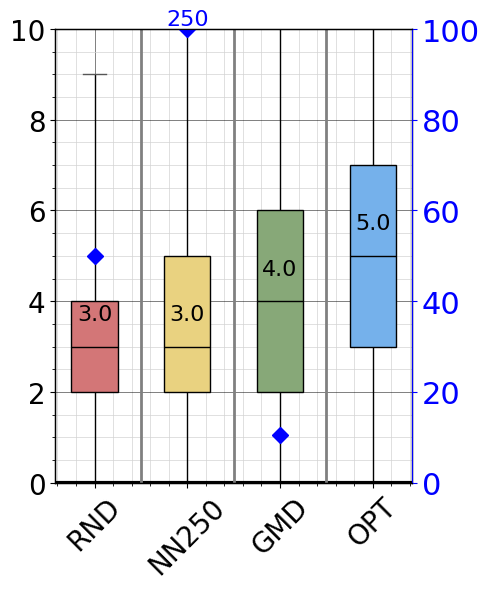

In [13]:
if model_train == 'mobnet' and model_infer == 'lstm':# Reordered labels
    labels = ['RND', 'NN250', 'GMD', 'OPT']

    # Reordered colors
    colors = ['#e36668', '#fadc6f', '#84b070', '#61b1ff']

    fig, ax = plt.subplots(figsize=(5, 6))  # Adjust the figure size as needed

    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(1)  # change width
        ax.spines[axis].set_color('k')    # change color

    sns.boxplot(data=datalist, 
                palette=colors,
                width=0.5, 
                whis=(0, 100), 
                linewidth=1,  # set linewidth directly in boxplot function
                whiskerprops=dict(color="black", alpha=1), 
                medianprops=dict(color="black", alpha=1),
                boxprops=dict(edgecolor="black"),
                ax=ax)

    ax2 = ax.twinx()
    for i, value in enumerate(mean_tries_list):
        ax2.plot(i, value, marker='D', markersize=8, color='blue', linestyle='None')
        
    ax2.tick_params(axis='y', which='major', labelsize=20)
    # ax2.set_ylabel('Mean Tries', fontsize=24, color='blue')
    ax2.spines['right'].set_color('blue')


    # Set the x-axis ticks and labels
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, fontsize=20)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    ax.tick_params(axis='y', which='major', labelsize=20)

    # Add gridlines
    ax.grid(which='major', linestyle='-', linewidth='0.5', color='black', alpha=0.7)
    ax.grid(which='minor', linestyle='-', linewidth='0.5', color='lightgray')
    ax.minorticks_on()

    # Add a horizontal line at y=0
    ax.axhline(y=0, linewidth=3, color='black')

    # Calculate medians for each group and add text annotations
    medians = [np.median(x) for x in datalist]
    # if model_train == 'resnet' and model_infer == 'mobnet':
    #     ax.text(labels.index('RND'), 0, f'{medians[0]:.2f}', ha='center', va='bottom', fontsize=16, color='black')
    #     ax.text(labels.index('NN50'), 0, f'{medians[1]:.2f}', ha='center', va='bottom', fontsize=16, color='black')
    #     ax.text(labels.index('NN250'), 0, f'{medians[2]:.2f}', ha='center', va='bottom', fontsize=16, color='black')
    #     ax.text(labels.index('GMD'), 0, f'{medians[3]:.2f}', ha='center', va='bottom', fontsize=16, color='black')
    #     ax.text(labels.index('OPT'), 0, f'{medians[4]:.2f}', ha='center', va='bottom', fontsize=16, color='black')

    # else:
    for label, median_value in zip(labels, medians):
        if(median_value >= 10):
            ax.text(labels.index(label), 9, f'{median_value:.1f}', ha='center', va='bottom', fontsize=16, color='black')
        else:
            ax.text(labels.index(label), median_value+0.5, f'{median_value:.1f}', ha='center', va='bottom', fontsize=16, color='black')

    ax2.text(labels.index('NN250'), 100, '250', ha='center', va='bottom', fontsize=16, color='blue')
    median_value = np.median(optim['num_train_batches_optim'])
    # ax.text(labels.index('OPT'), median_value, f'{median_value:.2f}', ha='center', va='bottom', fontsize=16, color='black')
    ax.axvline(x=labels.index('RND') + 0.5, color='grey', linestyle='-', linewidth=2)
    ax.axvline(x=labels.index('NN250') + 0.5, color='grey', linestyle='-', linewidth=2)
    ax.axvline(x=labels.index('GMD') + 0.5, color='grey', linestyle='-', linewidth=2)
    # Adjust y-axis limits
    ax.set_ylim(0, 10)
    ax2.set_ylim(0, 100)
    ax.set_axisbelow(True)
    ax2.tick_params(axis='y', labelsize=22, colors='blue')
    ax2.spines['right'].set_color('blue')
    # ax.set_ylabel('Train Mini batches', fontsize=24)

    plt.tight_layout()
    plt.savefig('boxPlot_num_train_batches_'+model_train+'_train_'+model_infer+'_infer'+'.pdf', format='pdf',dpi=300, bbox_inches='tight')
    plt.show()
